# Deep Learning

- **NNs with many layers** - known as deep neural networks.
- These layers can extract high-level features from raw data.
- Its a **hierarchical feature learning**:
  > Lower layers extract basic features, while higher layers combine these features to create more complex abstractions.
- The more data you have, the more accurately deep learning models can learn.
- Therefore, require significant computational power, therefore GPUs.
- Can be trained end-to-end, meaning they can learn directly from raw data without requiring extensive manual feature engineering.

- Deep learning has been successfully applied in many fields, including:

> 1. Computer Vision: Image classification, object detection, facial recognition, etc.
> 2. Natural Language Processing: Text classification, translation, chatbots, language modeling, etc.
> 3. Speech Recognition: Automatic speech recognition, speech-to-text, voice assistants.
> 4. Healthcare: Medical image analysis, disease prediction, personalized medicine.
> 5. Autonomous Vehicles: Sensor data interpretation, environment mapping, decision-making.
> 6. Finance: Fraud detection, stock price prediction, algorithmic trading.

# 1. Tensor

- A n-dimensional array.
> - A mathematical object with varying dimensions.
> - from simple one-dimensional arrays (vectors) to higher-dimensional arrays (like matrices and beyond).

- Why do we need to know tensors?
> - In popular DL frameworks like TensorFlow and PyTorch, tensors are central to data representation and computation.

- In python, one way we can say, <u>Tensor is nothing but a List</u> but All lists in python are not n-dimensional array.


## 1. Shape of tensor
### shape(tensor: Tensor) -> List[int]:

In [12]:
# Let's find shape of a tensor

Tensor = list # type of tensor is list

from typing import List

def shape(tensor: Tensor) -> List[int]:
    sizes: List[int] = []
    while isinstance(tensor, list):
        sizes.append(len(tensor))
        # print(tensor)
        tensor = tensor[0]
        
    return sizes

assert shape([[[1, 2, 3],[4, 5, 6]],[[7, 8, 9],[10, 11, 12]]]) == [2,2,3]
assert shape([1, 2, 3]) == [3]
assert shape([[1, 2], [3, 4], [5, 6]]) == [3, 2]

## 2. Recursion
- Because tensors can have any number of dimensions, we’ll typically need to work with them recursively.
- We’ll do one thing in the one-dimensional case and recurse in the higher-dimensional case

### is_1d(tensor: Tensor) -> bool:

In [13]:
# Find if tensor is 1D

def is_1d(tensor: Tensor) -> bool:
    """
    If tensor[0] is a list, it's a higher-order tensor.
    Otherwise, tensor is 1-dimensional (that is, a vector).
    """
    return not isinstance(tensor[0], list)

assert is_1d([1,2,3,4]) == 1
assert is_1d([[1,2],[3,4]]) == 0
assert not is_1d([[1,2],[1,3]]) == 1

### tensor_sum(tensor: Tensor) -> float:

In [14]:
# Let's do recursion for tensor_sum 
def tensor_sum(tensor: Tensor) -> float:
    """
    Sums up all the values in a tensor
    """
    if is_1d(tensor):
        return sum(tensor)
    else:
        return sum(tensor_sum(t) for t in tensor)

assert tensor_sum([[[1,2,1], [3,4,1]], [[5,6,1], [7,8,1]]]) == 40
assert shape([[[1,2,1], [3,4,1]], [[5,6,1], [7,8,1]]]) == [2,2,3]

- Let's create a function that can do recursion everytime we want

### tensor_apply(f: Callable[[float], float], tensor: Tensor) -> Tensor:

In [15]:
from typing import Callable

def tensor_apply(f: Callable[[float], float], tensor: Tensor) -> Tensor:
    """
    Applies f elementwise
    """
    if is_1d(tensor):
        return [f(x) for x in tensor]

    else:
        return [tensor_apply(f, t) for t in tensor]

assert tensor_apply(lambda x: x*2,[[1,2], [3, 4]]) == [[2, 4], [6, 8]]

# tensor_apply(lambda x: sum(x), [1,2]) with f = sum(x) and tensor as 1d list will not work because sum operates on iterables only
# tensor_apply(lambda x: sum(x), [(1,1)]) with f = sum(x) and tensor as list of tuple will work because tuple is nested iterable

In [16]:
tensor_apply(lambda x: x*2, [[[1,2],[3,4]],[[5,6],[7,8]]])

[[[2, 4], [6, 8]], [[10, 12], [14, 16]]]

In [17]:
tensor_apply(lambda x: sum(x), [(1,1)]) # while using sum basic attribute must be iterative (list, tuple etc)

[2]

### zeros_like(tensor: Tensor) -> Tensor:

In [18]:
# create a all 0 tensor generating function using tensor_apply

def zeros_like(tensor: Tensor) -> Tensor:
    return tensor_apply(lambda _: 0.0, tensor)

assert zeros_like([1,2]) == [0.0, 0.0]
assert zeros_like([[1,2,1],[3,4,1]]) == [[0.0, 0.0, 0.0],[0.0,0.0,0.0]]

- Create a function to apply on corresponding elements from two tensors (which had better be the exact same shape, although we won’t check that):

### tensor_combine(f, t1, t2) -> Tensor:

In [19]:
def tensor_combine(f: Callable[[float, float], float],
                   t1: Tensor,
                   t2: Tensor) -> Tensor:
    """
    Applies f to corresponding elements of t1 and t2
    """
    if is_1d(t1):
        return [f(x,y) for x,y in zip(t1, t2)]
    else:
        return [tensor_combine(f, t1_i, t2_i) 
                for t1_i, t2_i in zip(t1,t2)]

import operator
assert tensor_combine(operator.add, [1, 2, 3], [4, 5, 6]) == [5, 7, 9]
assert tensor_combine(operator.mul, [1, 2, 3], [4, 5, 6]) == [4, 10, 18]

In [20]:
# rough

t1= [[[1,2],[3,4]],[[5,6],[7,8]]]
t2 = [[[8,7],[6,5]],[[4,3],[3,1]]]
f = lambda x, y: x*y
result =[]
for x, y in zip(t1,t2):
    # print(x,y)
    for i, j in zip(x,y):
        # print(i,j)
        for m, n in zip(i,j):
            # print(m, n)
            result.append(f(m,n))
print(result)           

[8, 14, 18, 20, 20, 18, 21, 8]


# 2. Layer Abstraction

**What is layer abstraction?**
> - Design pattern used in the implementation of neural networks, which provides a generalized interface for different types of layers.
> - This abstraction <u>allows you to treat different types of layers</u> (such as fully connected layers, convolutional layers, activation layers, etc.) in a consistent manner.
> - The idea is to define a base class or interface that specifies the common operations (like forward and backward methods) that all layer types must implement.

**Why do we need Layer Abstraction in DL?** 
1. A simple NN of Last Chapter had only 2 layers.(<u>And frequently we’d like to use more than two layers</u>)
> - our feed_forward function could handle any number of layers btw.
> - but our gradient computation was not designed so.

2. The Network was designed to use sigmoid as activation function (<u>Perhaps we would like to use other activation function</u>)

3. It just takes output from previous layer and pass that (<u>Perhaps we’d like the neurons to remember something about their previous inputs.</u>)

**Key Components of Layer Abstraction**
1. Base Class or Interface:

- The base class (often named something like Layer) defines the essential methods that all derived layer classes must implement. These methods usually include:
> - forward: Defines how the layer processes input data to produce output.
> - backward: Defines how the layer computes gradients during backpropagation.
> - params: Optionally, a method to return the parameters of the layer (e.g., weights and biases).

2. Derived Classes:
> These are specific implementations of different types of layers (e.g., Linear, Convolution, Sigmoid).
> Each derived class implements the methods defined in the base class according to the specific behavior of that layer type.

**Benefits of Layer Abstraction**

> 1. Modularity: Makes it easier to build, extend, and modify neural networks. Different types of layers can be added or replaced without changing the overall structure of the network.
> 2. Reusability: Common functionality is encapsulated in the base class, reducing code duplication.
> 3. Interchangeability: Layers can be interchanged or reordered in the network without affecting the rest of the code.

## 1. Layer Class

Let's break down the key components of this class:

1. **Forward Method (forward)**

> - Takes an input tensor and performs the forward pass computation specific to the layer.
> - It should apply some function to its inputs and return the result.
> - In the Layer class, this method is <u>defined as an abstract method</u>, meaning it must be implemented by subclasses.

2. **Backward Method (backward)**

> - This method takes a gradient tensor and performs the backward pass computation specific to the layer.
> - It computes the gradient of the loss with respect to the layer's inputs.
> - Similar to the forward method, it's defined as an abstract method in the Layer class and must be implemented by subclasses.

3. **Parameters and Gradients (params and grads)**

> - These methods are used to retrieve the parameters and gradients of the layer, respectively.
> - Parameters represent the weights and biases of the layer that are learned during training.
> - Gradients represent the gradients of the loss function with respect to the parameters, which are used in the optimization process (e.g., gradient descent).
> - The default implementation of these methods returns an empty iterable, indicating that some layers may not have parameters to update.


### class Layer:

In [21]:
# Layer with only class attributes (4 methods only)

from typing import Iterable, Tuple

class Layer: 
    """
    Our neural networks will be composed of Layers, each of which
    knows how to do some computation on its inputs in the "forward"
    direction and propagate gradients in the "backward" direction.
    """
    def forward(self, input):
        """
        Note the lack of types. We're not going to be prescriptive
        about what kinds of inputs layers can take and what kinds
        of outputs they can return.
        """
        raise NotImplementedError   # Abstract class

    def backward(self, gradient):
        """
        Similarly, we're not going to be prescriptive about what the
        gradient looks like. It's up to you the user to make sure
        that you're doing things sensibly.
        """
        raise NotImplementedError   # Abstract class

    def params(self) -> Iterable[Tensor]:
        """
        Returns the parameters of this layer. The default implementation
        returns nothing, so that if you have a layer with no parameters
        you don't have to implement this.
        """
        return ()
        
    def grads(self) -> Iterable[Tensor]:
        """
        Returns the gradients, in the same order as params().
        """
        return ()

- When a method or function with raise **NotImplementedError** is called,
> - it indicates that the functionality of that method or function has not been implemented in the current class
> - and it serves as a reminder or signal to the programmer that they need to provide their own implementation in a subclass.

- Some layers (for example, a layer that applies sigmoid to each of its inputs) have no parameters to update, so we provide a default implementation that handles that case.

- The Sigmoid class provided as an example subclass of Layer
> - It demonstrates how to implement the forward and backward methods for a specific type of layer (in this case, a sigmoid activation layer).
> - It applies the sigmoid function element-wise to the input tensor during the forward pass and computes the gradient during the backward pass using the chain rule.

### class Sigmoid(Layer):

In [22]:
# Sigmoid layer

from scratch.neural_networks import sigmoid

class Sigmoid(Layer):
    def forward(self, input: Tensor) -> Tensor:
        """
        Apply sigmoid to each element of the input tensor,
        and save the results to use in backpropagation.
        """
        self.sigmoids = tensor_apply(sigmoid, input)
        return self.sigmoids

    def backward(self, gradient: Tensor) -> Tensor:
        return tensor_combine(lambda sig, grad: sig * (1-sig) * grad, 
                              self.sigmoids, 
                              gradient)

# backward function represents gradient of loss function wrt inputs of sigmoid layer i.e. PD(L)/PD(z)
# see derivation in Last chapter NN eq 10

- During the forward pass we saved the computed sigmoids so that we could use them later in the backward pass.
- we were able to make use of the tensor_apply and the tensor_combine functions. Most of our layers will use these functions similarly.

# 3. Linear Layer
- To represent `dot(weights, inputs)` part of neurons.
  
- We need to initialize weights. But how?
  
- The initial parameter values can make a huge difference in how quickly (and sometimes whether) the network trains.
> - If weights are too big, they may produce large outputs in a range where the activation function has near-zero gradients.
> - And parts of the network that have zero gradients necessarily can’t learn anything via gradient descent.

- Therefore, we will implement three different schemes for randomly generating our weight tensors.
  > 1. Choose each value from the **random uniform distribution on [0, 1]—that is, as a random.random()**.
  > 2. Choose each value randomly from a **standard normal distribution**.
  > 3. Use **Xavier initialization**, where each weight is initialized with a random draw from a normal distribution with mean 0 and variance 2 / (num_inputs + num_outputs).  
  > - It turns out this often works nicely for neural network weights.  
  > - We’ll implement these with a random_uniform function and a random_normal function. 

## 1. Random weight generating function

### (a) random_uniform(*dims) -> Tensor:
- 'dims' is dimension of tensor 

In [25]:
import random

from scratch.probability import inverse_normal_cdf

def random_uniform(*dims: int) -> Tensor: # *dim is args(arbitrary positional arguments)
    if len(dims) == 1:
        return [random.random() for _ in range(dims[0])]
    else:
        return [random_uniform(*dims[1:]) for _ in range(dims[0])]

### (b) random_normal(*dims, mean, variance) -> Tensor:
- 'dims' is dimension of tensor

In [26]:
def random_normal(*dims: int, mean: float = 0.0, variance: float = 1.0) -> Tensor:
    if len(dims) == 1:
        # return_value = [mean + variance * inverse_normal_cdf(random.random())
                # for _ in range(dims[0])]
        # print(return_value)
        # return return_value
        return [mean + variance * inverse_normal_cdf(random.random())
                for _ in range(dims[0])]
    else:
        return [random_normal(*dims[1:], mean = mean, variance = variance)
                for _ in range(dims[0])]


In [27]:
# Example

# random weight generation for 1D tensor with 5 elements
random_normal(3,2)

[[0.5577182769775391, 0.030698776245117188],
 [-0.5857563018798828, -0.44335365295410156],
 [-0.16068458557128906, 0.8847522735595703]]

In [29]:
# Example

# random weight generation for 3D tensor with 2x5 elements 

random_normal(3,2,5)

[[[-0.09682655334472656,
   0.36614418029785156,
   -0.33316612243652344,
   1.3913822174072266,
   -1.3856983184814453],
  [1.098012924194336,
   -1.212015151977539,
   0.39383888244628906,
   -1.170358657836914,
   0.12001991271972656]],
 [[-0.2908611297607422,
   -1.857461929321289,
   0.4556751251220703,
   -0.36385536193847656,
   0.43150901794433594],
  [-0.9500408172607422,
   -1.413564682006836,
   -0.010786056518554688,
   -1.8938350677490234,
   -0.22400856018066406]],
 [[1.430673599243164,
   -0.7377147674560547,
   -1.2630176544189453,
   -0.49683570861816406,
   -0.48605918884277344],
  [-1.2985515594482422,
   0.43845176696777344,
   0.9348201751708984,
   -0.3882884979248047,
   0.48506736755371094]]]

In [30]:
assert shape(random_uniform(2, 3, 4)) == [2, 3, 4]
assert shape(random_normal(5, 6, mean=10)) == [5, 6]

- Let's wrap the random value tensor generating functions into one function. 

### (c) random_tensor(*dims, init) -> Tensor
- combining random_uniform and random_normal functions

In [31]:
def random_tensor(*dims: int, init: str = 'normal') -> Tensor:
    if init == 'uniform':   # init means initialization method
        return random_uniform(*dims)
    elif init == 'normal':
        return random_normal(*dims)
    elif init == 'xavier':
        variance = len(dims)/sum(dims)
        # print(variance)
        return random_normal(*dims, variance= variance)
    else:
        raise ValueError(f"unknown init: {init}")

random_tensor(2,3,init='xavier')

[[0.8407859802246094, -0.3033409118652344, 0.3313560485839844],
 [0.2762718200683594, -0.3987617492675781, 0.024929046630859375]]

## 2. Define 'Linear' layer class (child class)
- Provide dimensions of input and output
- Initialize weights with whichever scheme we want

### Implement Forward pass
- For each neuron do: <u>dot(input, w[o]) + bias</u>
- Stick all outputs in a vector

### Implement Backward pass
- Things to understand using calculus:

1. <u>Gradient of the bias</u> is the same as the <u>Gradient of the output</u>

> - From forward pass for a single neuron, 
$$
output = wx + b 
$$

> - During backpropagation we calculate gradient of Loss function wrt output of neuron:
$$
\frac{\partial \text{loss}}{\partial \text{output}} = \text{gradient}
$$
> The gradient of the loss function with respect to the bias \( b \) is:
$$
\frac{\partial \text{loss}}{\partial b} = \frac{\partial \text{loss}}{\partial \text{output}} \cdot \frac{\partial \text{output}}{\partial b}
$$

> Since, $\text{output} = wx + b$, the partial derivative $ \frac{\partial \text{output}}{\partial b} $ is 1. Thus:
$$
\frac{\partial \text{loss}}{\partial b} = \text{gradient} \cdot 1 = \text{gradient}
$$

- Therefore, the gradient of the bias is the same as the gradient of the output.

2. Remember what we are calculating in backward pass
   > 1. First calculate gradient of L wrt output
   > 2. Using that find gradients of L wrt all weights which will be
   >    $$gradient\_wrt\_weight = input * gradinet\_wrt\_o/p$$
   > 3. Find gradient of inputs which will be new gradients of output for next layer (backward)
   > 4. Again find the gradients wrt weights of this new layer and so on..

3. After finding all gradients wrt weights, find new weights.
   >$$new\_weight = weight - learning\_rate * gradient\_wrt\_weight$$
   > Now for each epoch repeat the same.

- In a “real” tensor library, these (and many other) operations would be represented as matrix or tensor multiplications, which those libraries are designed to do very quickly. Our library is very slow.

### Implement parameters and gradients

### class Linear(Layer):

In [26]:
from scratch.linear_algebra import dot

class Linear(Layer):
    def __init__(self,
               input_dim: int,
               output_dim: int, 
               init: str = 'xavier') -> None:
        """
        A layer of output_dim neurons, each with input_dim weights (and a bias)
        """
        self.input_dim = input_dim
        self.output_dim = output_dim

        # self.w[o] is weights of oth neuron of the layer
        self.w = random_tensor(output_dim, input_dim, init = init)

        # self.b[o] is the bias term for the oth neuron
        self.b = random_tensor(output_dim, init=init)

    def forward(self, input: Tensor) -> Tensor:
        # Save inputs to use in backward pass
        self.input = input

        # Return vector of neuron outputs
        return [dot(input, self.w[o]) + self.b[o] 
                for o in range(self.output_dim)]
    
    def backward(self, gradient: Tensor) -> Tensor:
        # gradient = gradient of L wrt output = gradient of L wrt bias
        self.b_grad = gradient
    
        # gradient wrt wights = input x gradient wrt output
        self.w_grad = [[self.input[i] * gradient[o] 
                        for i in range(self.input_dim)]
                       for o in range(self.output_dim)]
        return [sum(self.w[o][i] * gradient[o] for o in range(self.output_dim))
                for i in range(self.input_dim)]

    def params(self) -> Iterable[Tensor]:
        return [self.w, self.b]

    def grads(self) -> Iterable[Tensor]:
        return [self.w_grad, self.b_grad]

# 4. Neural Networks as a Sequence of Layers


### class Sequential(Layer):

In [27]:
from typing import List

class Sequential(Layer):
    """
    A layer consisting of a sequence of other layers.
    It's up to you to make sure that the output of each layer
    makes sense as the input to the next layer.
    """
    def __init__(self, layers: List[Layer]) -> None:
        self.layers = layers

    def forward(self, input):
        """Just forward the input through the layers in order."""
        for layer in self.layers:
            input = layer.forward(input)
        return input

    def backward(self, gradient):
        """Just backpropagate the gradient through the layers in reverse."""
        for layer in reversed(self.layers):
            gradient = layer.backward(gradient)
        return gradient

    def params(self) -> Iterable[Tensor]:
        """Just return the params from each layer."""
        return (param for layer in self.layers for param in layer.params())
   
    def grads(self) -> Iterable[Tensor]:
        """Just return the grads from each layer."""
        return (grad for layer in self.layers for grad in layer.grads())

In [28]:
# So we could represent the neural network we used for XOR as:

xor_net = Sequential([Linear(input_dim = 2, output_dim = 2),
                      Sigmoid(),
                      Linear(input_dim = 2, output_dim =1),
                      Sigmoid()])

- but we need more machinery to train it.

# 5. Loss and Optimization

- We will experiment with different loss functions
- Thus, we will create a new Loss abstraction that encapsulate both -
> 1. Loss computation
> 2. Gradient computation

## class Loss:

In [29]:
class Loss:
    def loss(self, predicted: Tensor, actual: Tensor) -> float:
        """
        How good are our predictions? (Larger numbers are worse.)
        """
        raise NotImplementedError

    def gradient(self, predicted: Tensor, actual: Tensor) -> Tensor:
        """
        How does the loss change as the predictions change?
        """
        raise NotImplementedError

## class SSE(Loss):

In [30]:
class SSE(Loss):
    """
    Loss function that computes the sum of the squared errors.
    """
    def loss(self, predicted: Tensor, actual: Tensor) -> float:    
        squared_errors = tensor_combine( lambda predicted, actual: (predicted-actual)**2, predicted , actual)
        return tensor_sum(squared_errors)
    def gradient(self, predicted: Tensor, actual: Tensor) -> Tensor:
        return tensor_combine(lambda predicted, actual: 2 * (predicted - actual),
                              predicted,
                              actual)

- In all previous ML methods we find gradient descent manually by training a loop with:
$$
  theta = gradient\_step(theta, grad, -learning\_rate)
  $$

- But now we will use <u>Optimizer abstraction</u> of which gradient descent will be one instance. Why?
  > 1. Our Neural nets will have many parameters and we will need to update all of them.
  > 2. We would like to use more clever variants of gradient descent.

## class Optimizer:

- By defining Optimizer abstraction, we can easily switch between our different optimizers.

In [31]:
class Optimizer:
    """
    An optimizer updates the weights of a layer (in place) using information
    known by either the layer or the optimizer (or by both).
    """
    def step(self, layer: Layer) -> None:
        raise NotImplementedError

### (a). class GradientDescent(Optimizer):

In [32]:
# Now let's implement gradient descent
class GradientDescent(Optimizer):
    def __init__(self, learning_rate: float = 0.1) -> None:
        self.lr = learning_rate

    def step(self, layer: Layer) -> None:
        for param, grad in zip(layer.params(), layer.grads()):
            # Update param using a gradient step
            param[:] = tensor_combine(lambda param, grad: param - (grad * self.lr), param, grad)

#### Slice assignment in param[:]
  > - It is a reflection of the fact that reassigning a list doesn’t change its original value.
  > - That is, if you just did param = tensor_combine(. . .), you would be redefining the local variable param, but you would not be affecting the original parameter tensor stored in the layer.
  > - If you assign to the slice [:], however, it actually changes the values inside the list.

In [33]:
# Example of slice[:]

tensor = [[1,2], [3,4]]

for row in tensor:
    row = [0,0]
assert tensor == [[1,2], [3,4]], "assignment doesn't update a list"

for row in tensor:
    row[:] = [0,0]
assert tensor == [[0, 0], [0, 0]], "but slice assignment does"

for row in tensor:
    row[0] = 1
    row[1] = 1
assert tensor == [[1, 1], [1, 1]], "element wise updation is possible"

### (b). class Momentum(Optimizer):

- The momentum optimizer is a variant of gradient descent 
- It accelerates convergence by <u>adding a fraction of the previous update to the current update.</u>
- This helps smooth out the optimization path and can help escape local minima or poorly conditioned regions of the loss surface.

- Momentum Term
> - The idea is to maintain a velocity vector (update) that is a running average of past gradients.
> - This velocity is used to update the parameters.

- Update Rule:

>**The velocity update:** 
>$$v_t = \beta v_{t-1} + (1 - \beta) \nabla J(\theta)$$

>**The parameter update:** 
$$
\theta = \theta - \alpha v_t
$$

>Here, 
>- $\beta$ is the momentum coefficient (usually between 0.8 and 0.99), 
>- $\alpha$ is the learning rate, 
>- $v_t$ is the current velocity, and 
>- $\nabla J(\theta)$ is the gradient of the loss function with respect to $\theta$


In [34]:
class Momentum(Optimizer):
    def __init__(self, 
                 learning_rate: float, 
                 momentum: float = 0.9) -> None:
        self.lr = learning_rate
        self.mo = momentum
        self.updates: List[Tensor] = []  #running velocity update

    def step(self, layer: Layer) -> None:
        # If we have no previous updates, start with all zeros
        if not self.updates:
            self.updates = [zeros_like(grad) for grad in layer.grads()]

        for update, param, grad in zip(self.updates, 
                                       layer.params(), 
                                       layer.grads()):
            # Apply momentum
            update[:] = tensor_combine(lambda u, g: (self.mo * u) + (1 - self.mo) * g,
                                       update,
                                       grad)
            # Apply gradient step
            param[:] = tensor_combine(lambda p, u: p - (self.lr * u), 
                                      param, update)

# 6. XOR Revisited

- Let's train a network that can compute XOR
- We will use following class structure

In [35]:
# 1. Training data
xs = [[0., 0], [0., 1], [1., 0], [1., 1]]
ys = [[0.], [1.], [1.], [0.]]

# 2. Define network

random.seed(0)

net = Sequential([Linear(input_dim = 2, output_dim =2),
                  Sigmoid(),
                  Linear(input_dim = 2, output_dim = 1)
                 ])

# 3. Training loop

import tqdm

optimizer = GradientDescent(learning_rate=0.1)
loss = SSE()

with tqdm.trange(3000) as t:
    for epoch in t:
        epoch_loss = 0.0
        
        for x,y in zip(xs,ys):
            predicted = net.forward(x)
            epoch_loss +=loss.loss(predicted,y)
            gradient = loss.gradient(predicted, y)
            net.backward(gradient)
            optimizer.step(net)
    t.set_description(f"xor loss {epoch_loss: .3f}")

100%|████████████████████████████████████| 3000/3000 [00:00<00:00, 21018.43it/s]


In [36]:
for param in net.params():
    print(param)

[[-1.6425160695224084, -1.4948117798303138], [-4.567646572029665, -3.364917635073193]]
[1.76737168232552, 0.38727014379472496]
[[3.198620479170403, -3.5018030621426184]]
[-0.6462765963362236]


In [37]:
#Let's check results
assert net.forward([0,0]) < [0.001] 
assert net.forward([0,1]) > [0.999]
assert net.forward([1,0]) > [0.999]
assert net.forward([1,1]) < [0.001]

# 7. Other Activation functions

**Problem with Sigmoid function**

1. sigmoid(0) = 1/2
   > - means that a neuron whose inputs sum to 0 has a positive output.
2. Gradient of sigmoid = sigmoid * (1-sigmoid)
   > - <u>Its gradient is very close to 0 for very large and very small inputs</u>
   > - Weights will thus update very tiny and get stuck
   > - This will slows down the training process significantly or even halts it, as the learning effectively stops.

**Other Activation functions**

## 1. tanh ("hyperbolic tangent") activation function

- Different sigmoid-shaped function
- Output ranges from (-1 to 1) with y = 0 at x = 0
- Equation:
$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} = \frac{1-e^{-2x}}{1+e^{-2x}}
$$
- Derivative:

$$
\frac{d}{dx}\tanh(x) = 1- tanh^{2}(x)
$$

- Plot:

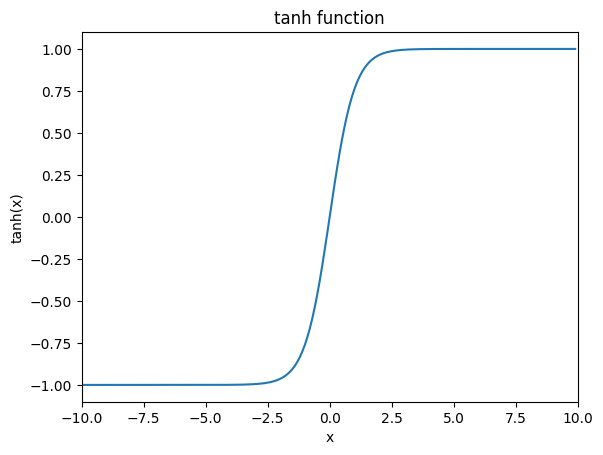

In [38]:
import math
from matplotlib import pyplot as plt
x = [i/10 for i in range(-100,100)]
y = [math.tanh(i) for i in x]

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.xlim([-10,10])
plt.title('tanh function')
plt.show()

### tanh function
- Let's define - "Tanh activation layer class" derived from base class - "Layer"

In [39]:
# define tanh

import math
def tanh(x: float) -> float:
    # If x is very large or very small, tanh is (essentially) 1 or -1.
    # We check for this because, e.g., math.exp(1000) raises an error.
    if x < -100:
        return -1
    elif x > 100:
        return 1

    em2x = math.exp(-2*x)
    return (1 - em2x)/(1+ em2x)

### class Tanh(Layer):

In [40]:
class Tanh(Layer):
    def forward(self, input: Tensor) -> Tensor:
        # Save tanh output to use in backward pass
        self.tanh = tensor_apply(tanh, input)
        return self.tanh

    def backward(self, gradient: Tensor) -> Tensor:
        return tensor_combine(lambda tanh, grad: (1 - tanh ** 2) * grad, self.tanh, gradient)

## 2. Relu Activation function
- In larger networks another popular replacement is Relu, which is <u>0 for negative inputs</u> and the <u>identity for positive inputs</u>:

- Relu function:
$$  f(x) = max(0,x) = 
\begin{cases}
0, \text{if} \ x <= 0 \\
x, \text{if} \ x > 0
\end{cases}
$$
 
- Derivative:
$$
\frac{d}{dx}f(x) =
\begin{cases}
0, \text{if} \ x <= 0 \\
1, \text{if} \ x > 0
\end{cases}
$$

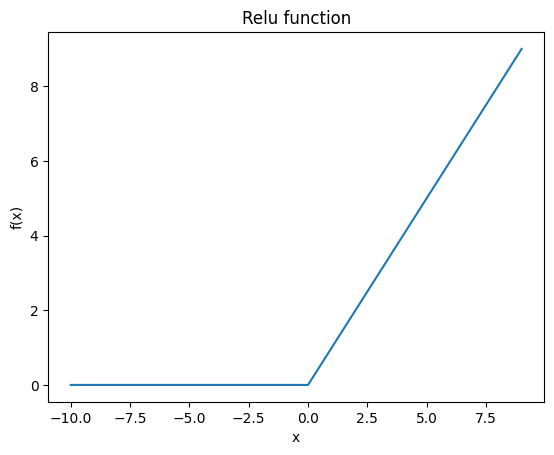

In [41]:
x = [i for i in range(-10,10)]
y = [0 if i < 0 else i for i in x]
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Relu function')
plt.show()

### class Relu(Layer):

In [42]:
class Relu(Layer):
    def forward(self, input: Tensor) -> Tensor:
        self.input = input
        return tensor_apply(lambda x: max(x, 0), input)
        
    def backward(self, gradient: Tensor) -> Tensor:
        return tensor_combine(lambda x, grad: grad if x > 0 else 0,
                              self.input,
                              gradient)

# 8. Example: FizzBuzz Revisited

Fizz Buzz problem
>- Print the numbers 1 to 100, except that if the number is divisible by 3, print "fizz";
>- if the number is divisible by 5, print "buzz";
>- and if the number is divisible by 15, print "fizzbuzz".

In [43]:
from scratch.neural_networks import binary_encode, fizz_buzz_encode, argmax
import random

xs = [binary_encode(i) for i in range(101, 1024)]    # inputs
ys = [fizz_buzz_encode(i) for i in range(101, 1024)] # outputs

# number of neurons in a hidden layer
NUM_HIDDEN = 25

random.seed(0)

net = Sequential([Linear(input_dim=10, output_dim=NUM_HIDDEN, init = 'uniform'),
                  Tanh(),
                  Linear(input_dim=NUM_HIDDEN, output_dim=4, init = 'uniform'),
                  Sigmoid()])

# Track Accuracy on training set

def fizzbuzz_accuracy(low: int, hi: int, net: Layer) -> float:
    num_correct = 0
    for n in range(low, hi):
        x = binary_encode(n)
        predicted = argmax(net.forward(x))
        actual = argmax(fizz_buzz_encode(n))
        if predicted == actual:
            num_correct += 1

    return num_correct/(hi-low)

optimizer = Momentum(learning_rate=0.1, momentum=0.9)
loss = SSE()

with tqdm.trange(100) as t:
    for epoch in t:
        epoch_loss = 0.0

        for x, y in zip(xs, ys):
            predicted = net.forward(x)
            epoch_loss += loss.loss(predicted, y)
            gradient = loss.gradient(predicted, y)
            net.backward(gradient)

            optimizer.step(net)

    accuracy = fizzbuzz_accuracy(101, 1024, net)
    t.set_description(f"fb loss: {epoch_loss:.2f} acc: {accuracy:.2f}")

# Now check results on the test set
print("test results", fizzbuzz_accuracy(1, 101, net))

100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.69it/s]

test results 0.57


- After 1,000 training iterations, the model gets 90% accuracy on the test set.
- If you keep training it longer, it should do even better.
- I don’t think it’s possible to train to 100% accuracy with only 25 hidden units, but it’s definitely possible if you go up to 50 hidden units.

# 9. Softmaxes and Cross-Entropy

## Overview
>- When working with classification problems, it's common to use a softmax activation function at the output layer to convert the raw output scores (logits) into probabilities.
>- This is followed by the cross-entropy loss function to evaluate the model's performance.

## Sigmoid vs. Softmax activation
- **Sigmoid**:
> - Outputs numbers between 0 and 1.
> - The sum of outputs doesn't necessarily equal 1.
> - It can result in ambiguous predictions where the model is unsure about the class.

## (a) Softmax Activation function
> - Converts vector of real numbers into vector of probabilities.
> - The sum of probabilities is 1, making it easier to interpret the output.

> - Softmax Function: 
$$ y_{i\_pred} = \text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}} $$

> 1. **Compute exponentials**: Convert each logit to its exponential value.
> 2. **Normalize**: Divide each exponential by the sum of all exponentials to get probabilities.

- If we ever end up trying to compute, say, exp(1000) we will get a Python error, so before taking the exp we subtract off the largest value.
- This turns out to result in the same probabilities; it’s just safer to compute in Python:

In [44]:
def softmax(tensor: Tensor) -> Tensor:
    """
    Softmax along the last dimension
    """
    if is_1d(tensor):
        # Subtract largest value for numerical stability
        largest = max(tensor)
        exps = [math.exp(x-largest) for x in tensor]
        sum_of_exps = sum(exps)
        return [exps_i/sum_of_exps for exps_i in exps]

    else:
        return [softmax(tensor_i) for tensor_i in tensor]

softmax([0,0,1,1])

[0.13447071068499755,
 0.13447071068499755,
 0.36552928931500245,
 0.36552928931500245]

## (b) Cross-Entropy

- Same as <u>negative log likelihood</u> Loss Function (see Chapter: Logistic regression)
- If our network outputs are probabilities, the cross-entropy loss represents the negative log likelihood of the observed data, which means that minimizing that loss is the same as maximizing the log likelihood (and hence the likelihood) of the training data.
> - Measures the performance of a classification model whose output is a probability value between 0 and 1.
> - It is given by:
> $$ \text{CrossEntropy}(y_{i\_actual}, y_{i\_pred}) = -\sum_{i} y_{i\_actual} \log(y_{i\_pred}) $$
Where \( p \) is the true distribution (one-hot encoded) and \( q \) is the predicted probability distribution.

- Typically we won’t include the softmax function as part of the neural network itself.
> - This is because it turns out that if softmax is part of your loss function but not part of the network itself, the gradients of the loss wrt the network outputs are very easy to compute.
> - The gradient of the cross-entropy loss with respect to the <u>logits(pre-activation outputs) $z_i$ </u>simplifies to the difference between the predicted probability $\hat{y}_i$ and the true label $y_i$:

$$ \frac{\partial L}{\partial z_i} = \hat{y}_i - y_i$$

In [45]:
class SoftmaxCrossEntropy(Loss):
    """ 
    This is the negative-log-likelihood of the observed values, given the
    neural net model. So if we choose weights to minimize it, our model will
    be maximizing the likelihood of the observed data.
    """

    def loss(self, predicted: Tensor, actual: Tensor) -> float:
        # Apply softmax to get probabilities
        probabilities = softmax(predicted)
        # This will be log p_i for the actual class i and 0 for the other
        # classes. We add a tiny amount to p to avoid taking log(0).
        likelihoods = tensor_combine(lambda p, act: math.log(p+1e-30) * act,
                                     probabilities,
                                     actual)
        # Then we sum up the negatives.
        return -tensor_sum(likelihoods)

    def gradient(self, predicted: Tensor, actual: Tensor) -> Tensor:
        probabilities = softmax(predicted)
        # Isn't this a pleasant equation?
        return tensor_combine(lambda p, actual: p - actual,
                              probabilities,
                              actual)

## FizzBuzz using Softmax and cross entropy 


In [46]:
random.seed(0)
net = Sequential([Linear(input_dim=10, output_dim=NUM_HIDDEN, init='uniform'),
                 Tanh(),
                 Linear(input_dim=NUM_HIDDEN, output_dim=4, init='uniform')])
                 # No final sigmoid layer now

optimizer = optimizer = Momentum(learning_rate=0.1, momentum=0.9)
loss = SoftmaxCrossEntropy()

with tqdm.trange(100) as t:
    for epoch in t:
        epoch_loss = 0.0
        for x, y in zip(xs, ys):
            predicted = net.forward(x)
            epoch_loss += loss.loss(predicted, y)
            gradient = loss.gradient(predicted, y)
            net.backward(gradient)
            optimizer.step(net)
        accuracy = fizzbuzz_accuracy(101, 1024, net)
        t.set_description(f"fb loss: {epoch_loss:.3f} acc: {accuracy:.2f}")

# Again check results on the test set
print("test results", fizzbuzz_accuracy(1, 101, net))


fb loss: 5.695 acc: 1.00: 100%|███████████████| 100/100 [00:15<00:00,  6.41it/s]

test results 0.95


# 10. Dropout for Regularizing Neural Networks

## Overfitting in Neural Networks

- Neural networks, like most ML models, are prone to overfitting to their training data.
- Overfitting occurs when the model learns to perform well on the training data but fails to generalize to unseen data.
- Regularization techniques, such as penalizing large weights, can help prevent overfitting.

## Dropout as a Regularization Technique

- **Dropout** is a common method to regularize NNs and prevent overfitting.
- During training, <u>dropout randomly turns off each neuron (i.e., replaces its output with 0) with a fixed probability `p`.</u>
- This forces the network to learn redundant representations and prevents it from depending too much on any single neuron.

## Dropout at Training and Evaluation Time

- **Training Time**: 
  - Dropout randomly masks some neurons by setting their output to 0.
  - The mask is created based on the specified probability `p`.
  - The output is scaled to account for the dropout, ensuring that the expected output remains consistent.
- **Evaluation Time**: 
  - Dropout is not applied, meaning no neurons are turned off.
  - The output is uniformly scaled down by the dropout probability to maintain consistency with the training phase.


In [47]:
class Dropout(Layer):
    def __init__(self, p: float) -> None:
        self.p = p
        self.train = True  # Indicates training mode

    def forward(self, input: Tensor) -> Tensor:
        if self.train:
            # Create a mask with 0s (dropped out) and 1s (kept)
            self.mask = tensor_apply(
                lambda _: 0 if random.random() < self.p else 1,
                input)
            # return inputs with masked elements
            return tensor_combine(operator.mul, input, self.mask)
        
        else:
            # During testing, just scale down the outputs
            return tensor_apply(lambda x: x*(1-self.p), input)

    def backward(self, gradient: Tensor) -> Tensor:
        if self.train:
            # Only propagate the gradients where mask == 1.
            return tensor_combine(operator.mul, gradient, self.mask)
        else:
            raise RuntimeError("don't call backward when not in train mode")

# 11. MNIST
- MNIST stands for Modified National Institute of Standards and Technology database.
- It is a popular dataset in the field of machine learning and computer vision, commonly used for training and testing various image classification algorithms.
- The MNIST dataset consists of a large collection of grayscale images of handwritten digits (0 to 9), each labeled with the corresponding digit.

**Here are some key features of the MNIST dataset:**

1. Image Size:
> - Each image is a grayscale image with dimensions of 28x28 pixels.
> - These images are relatively small and simple, making them ideal for experimentation and learning purposes.

2. Training and Test Sets:
> - The training set contains 60,000 images, while the test set contains 10,000 images.

3. Labeling:
> - Each image in the MNIST dataset is associated with a label indicating the digit it represents (0 to 9).

4. Standard Benchmark:
> - Due to its simplicity and widespread use, the MNIST dataset has become a standard benchmark for evaluating the performance of various machine learning algorithms, particularly in the field of image classification.
> - Many researchers use MNIST as a starting point to develop and test new algorithms before moving on to more complex datasets.



**Keras**

- Keras is an open-source deep learning framework written in Python. 
- It is designed to be user-friendly, modular, and extensible, allowing users to build and experiment with various types of neural networks quickly and easily.

In [ ]:
# download mnist dataset from keras

from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.tolist()
train_labels = train_labels.tolist()
test_images = test_images.tolist()
test_labels =  test_labels.tolist()
assert shape(train_images) == [60000, 28, 28]
assert shape(train_labels) == [60000]
assert shape(test_images) == [10000, 28, 28]
assert shape(test_labels) == [10000]

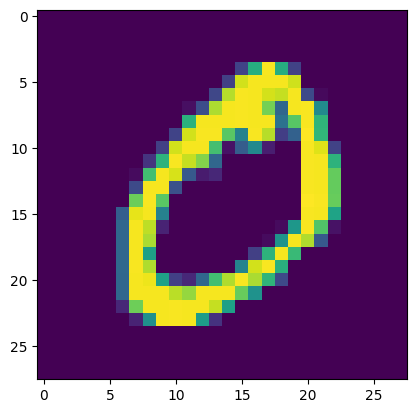

In [49]:
# Let's see images
import matplotlib.pyplot as plt
plt.imshow(train_images[1])

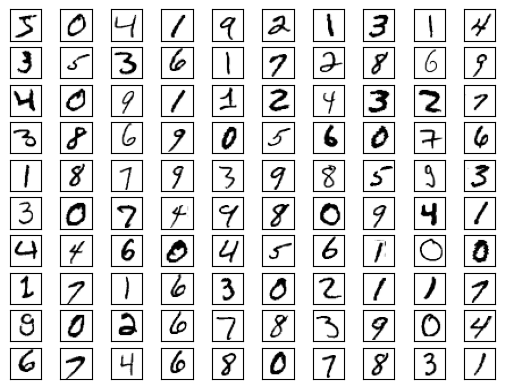

In [50]:
# Let's plot first 100 training images to see how they look.
import matplotlib.pyplot as plt
fig, ax = plt.subplots(10, 10)
for i in range(10):
    for j in range(10):
        # Plot each image in black and white and hide the axes.
        ax[i][j].imshow(train_images[10 * i + j], cmap='Greys')
        ax[i][j].xaxis.set_visible(False)
        ax[i][j].yaxis.set_visible(False)
plt.show()

**Steps for MNIST image recognition**

1. Flatten the pixels:
   > - image is 2D i.e. 28 x 28 pixels
   > - But our Linear layer can take only 1D input
2. Mean Normalization of input
   > - Divide the pixels by 256 to get them between 0 and 1
   > - Substract by mean
- **why we do mean normalisation?**
  > 1. Smaller the values, faster the gradient decsent
  > 2. Activation functions are most sensitive/linear when input is centered around 0 because there gradinet is larger therefore, more efficient training
  > 3. Makes input less biased in initial stages
  > 4. Balanced weight updates during BP and thus stable learning

In [51]:
# Compute mean pixel value of complete training dataset
avg = tensor_sum(train_images) /60000/28/28

# shape(train_images)


# Recenter, rescale, and flatten
train_images = [[(pixel - avg)/256 
                 for row in image
                 for pixel in row]
                for image in train_images
                ]  # flattened, therefore pay attention to brackets
# assert shape(train_images)

test_images = [[(pixel - avg)/256 
                 for row in image
                 for pixel in row]
                for image in test_images
                ]  # flattened, therefore pay attention to brackets
# assert shape(test_images)

In [52]:
# Understand the for loops for flattening with this example
x = [[[1,2,3],[4,3,3]],[[11,22,33],[44,33,35]]]
x_flat = [[x_i for row in elements
     for x_i in row]for elements in x]
print(f"{x_flat=}")

x_flat=[[1, 2, 3, 4, 3, 3], [11, 22, 33, 44, 33, 35]]


In [53]:
# After centering, average pixel should be very close to 0

assert -0.0000001 < tensor_sum(train_images) < 0.0000001

### One-hot-Encoding

- Used to represent categorical data as binary vectors.
- When you one-hot encode a categorical variable, you create a new binary variable (feature) for each unique category. For each observation, you set the binary variable corresponding to the category to 1 and all other binary variables to 0.

In [32]:
# One-hot-encode the targets
# i is index of category to encode 
# num_lables is total number of categories(default 10)
from typing import List
def one_hot_encode(i: int, num_lables: int=10) -> List[float]:
    return [1.0 if i==j else 0 for j in range(num_lables)]

assert one_hot_encode(3) == [0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0]
assert one_hot_encode(2, num_lables=5) == [0, 0, 1.0, 0, 0]

# train_labels_before_encoding = train_labels
# assert shape(train_labels_before_encoding) == [60000]

# Applying it to our data
train_labels = [one_hot_encode(label) for label in train_labels] # From hereon train_labels = hot encoded train labels
shape(train_labels) 
assert shape(train_labels) == [60000, 10]

test_labels = [one_hot_encode(label) for label in test_labels]

NameError: name 'train_labels' is not defined

- Create function loop
- it handles the process of iterating over the dataset, making predictions with the model, calculating loss, checking accuracy, and updating the model's weights if an optimizer is provided.
- It also provides a progress bar that updates in real-time, showing the current loss and accuracy.

In [55]:
import tqdm

def loop(model: Layer,
         images: List[Tensor],
         labels: List[Tensor],
         loss: Loss,
         optimizer: Optimizer = None) -> None:  # optimizer is optional
    correct = 0        # Track number of correct predictions
    total_loss = 0.0   # Track total loss

    with tqdm.trange(len(images)) as t:  # Loop iterating over number of images
        for i in t:
            predicted = model.forward(images[i])   # Predict
            if argmax(predicted) == argmax(labels[i]): # Match index of max value
                correct +=1 
            total_loss += loss.loss(predicted, labels[i]) 

            # If we're training, backpropagate gradient and update weights.
            if optimizer is not None:
                gradient = loss.gradient(predicted, labels[i]) # find output gradient
                model.backward(gradient) # find gradient wrt weights
                optimizer.step(model)  # update weights

        # And update our metrics in the progress bar.
        avg_loss = total_loss / (i + 1)
        acc = correct / (i + 1)
        t.set_description(f"mnist loss: {avg_loss:.3f} acc: {acc:.3f}")


In [56]:
random.seed(0)
# Logistic regression is just a linear layer followed by softmax
model = Linear(784, 10)
loss = SoftmaxCrossEntropy()
# This optimizer seems to work
optimizer = Momentum(learning_rate=0.01, momentum=0.99)
# Train on the training data
loop(model, train_images, train_labels, loss, optimizer)

# Test on the test data (no optimizer means just evaluate)
loop(model, test_images, test_labels, loss)

100%|███████████████████████████████████| 10000/10000 [00:02<00:00, 3615.62it/s]


- This gets about 89% accuracy.
- Let’s use two hidden layers, the first with 30 neurons, and the second with 10 neurons.
- And we’ll use our Tanh activation.

In [57]:
random.seed(0)

dropout1 = Dropout(0.1)
dropout2 = Dropout(0.1)

model = Sequential([Linear(784, 30), 
                    dropout1, 
                    Tanh(), 
                    Linear(30, 10),
                    dropout2,
                    Tanh(),
                    Linear(10,10)])
                    

In [58]:
optimizer = Momentum(learning_rate=0.01, momentum=0.99)
loss = SoftmaxCrossEntropy()

dropout1.train = dropout2.train = True  # for forward pass
loop(model, train_images, train_labels, loss, optimizer)

dropout1.train = dropout2.train = False # for backward propagation
loop(model, test_images, test_labels, loss)

100%|███████████████████████████████████| 10000/10000 [00:08<00:00, 1119.04it/s]


- It gives 92% accurcy on the test set (better than simple logistic model)
- The MNIST website describes a variety of models that outperform these. Many of them could be implemented using the machinery we’ve developed so far but would take an extremely long time to train in our lists-as-tensors
framework.
- To see: Convolutional layers. 

# 12. Saving and Loading Models

- Once we trained our model, we can save our weights using 'json' module to serialize model weights to a file.
- So, that we will not need to retrain our model everytime.

In [59]:
# Define a function to save weights
# Use Layer.params() to collect weights and biases
# Serialize weights to a file using json.dump

import json
def save_weights(model: Layer, filename: str) -> None:
    weights = list(model.params())
    with open(filename, 'w') as f:
        json.dump(weights, f)

In [60]:
# Loading model weights
def load_weights(model: Layer, filename: str) -> None:
    with open(filename) as f:
        weights = json.load(f)
    # Check for consistency
    assert all(shape(param) == shape(weight) for param, weight in zip(model.params(), weights))
    # Then load using slice assignment
    for param, weight in zip(model.params(), weights):
        param[:] = weight

In [61]:
# save_weights(model, 'model_weights.json')
w = load_weights(model, 'model_weights.json')
type(w)
for i, param in enumerate(model.params()):
        # print(f"Weight {i}: {param}")

Weight 0: [[-0.004761129912267741, -0.005530302224561382, -0.007742029957376608, -0.00883849767142854, -0.007180135360142744, -0.007840724704814003, -0.005320587602157576, -0.008514670176275364, -0.00739378652517931, -0.006732213044849898, -0.003983662742283472, -0.0072207192401430925, -0.008506372146609908, -0.005192836131422557, -0.006509517204478296, -0.008902888261637008, -0.003959153078033839, -0.0020529760352906916, -0.00509058103975357, -0.004070219816603001, -0.008466822437845337, -0.005745124979667359, -0.004116989692169277, -0.0060729827446588955, -0.007421248596403599, -0.01038855819670888, -0.0076568319275374455, -0.006557599260922148, -0.003909196477479109, -0.0027456200842579056, -0.007391255890629638, -0.004535809710140916, -0.00882482803973443, -0.005140467686561809, -0.007705438902930364, -0.014400343058629382, -0.005544685077694, -0.008249839792363848, -0.0032885530268271035, -0.0010535627367319095, -0.0037436572659230397, 0.0034251243796197413, -0.00147417988704882, 

In [62]:
# import json
# def load_weights(filename: str):
#     with open(filename) as f:
#         weights = json.load(f)
#         return weights

# w = load_weights('model_weights.json')
# shape(w)

[6, 30, 784]

- JSON stores your data as text, which makes it an extremely inefficient representation.
- In real applications you’d probably use the pickle serialization library, which serializes things to a more efficient binary format.
- Download weights from various networks: https://github.com/joelgrus/data-science-from-scratch